## Modfiy temperature by 1 K and check that the std dev of difference in energies is small (for vanilla rest)

In [30]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt

DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.4.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collecti

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import pickle
import os
from openeye import oechem
from perses.annihilation.rest import RESTTopologyFactory
from perses.annihilation.lambda_protocol import RESTState
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache, utils
from perses.dispersed.utils import configure_platform
cache.global_context_cache.platform = configure_platform(utils.get_fastest_platform().getName())
from simtk import openmm, unit
import math
from openmmtools.constants import kB
from openmmtools import mcmc, multistate
import argparse
import copy
from perses.dispersed import feptasks
import mdtraj as md
import numpy as np
from perses.app.relative_point_mutation_setup import PointMutationExecutor
from perses.tests.test_topology_proposal import generate_atp, generate_dipeptide_top_pos_sys


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:rdkit:Enabling RDKit 2021.03.3 jupyter extensions


In [3]:
# Create repartitioned hybrid system for lambda 0 endstate
atp, system_generator = generate_atp(phase='solvent')
htf = generate_dipeptide_top_pos_sys(atp.topology,
                                     new_res='THR',
                                     system=atp.system,
                                     positions=atp.positions,
                                     system_generator=system_generator,
                                     conduct_htf_prop=True,
                                     repartitioned=True,
                                     endstate=0,
                                     validate_endstate_energy=False)
system = htf.hybrid_system



DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{9: 7}, {10: 7}, {11: 7}, {12: 7}, {13: 7}, {9: 8}, {10: 8}, {11: 8}, {12: 8}, {13: 8}, {9: 9}, {10: 9}, {11: 9}, {12: 9}, {13: 9}]
INFO:proposal_generator:{9: 7}
INFO:proposal_generator:{10: 7}
INFO:proposal_generator:{11: 7}
INFO:proposal_generator:{12: 7}
INFO:proposal_generator:{13: 7}
INFO:proposal_generator:{9: 8}
INFO:proposal_generator:{10: 8}
INFO:proposal_generator:{11: 8}
INFO:proposal_generator:{12: 8}
INFO:proposal_generator:{13: 8}
INFO:proposal_generator:{9: 9}
INFO:proposal_generator:{10: 9}
INFO:proposal_generator:{11: 9}
INFO:proposal_generator:{12: 9}
INFO:proposal_generator:{13: 9}
INFO:proposal_generator:Returning map that best satisfies matching_criterion
IN

making topology proposal


INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 8
INFO:geometry:Atom index proposal order is [10, 18, 14, 15, 13, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching fun

generating geometry engine
making geometry proposal from ALA to THR


INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (7, 6, 8, 10, [1, Quantity(value=0.9900002084555819, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 1]), 1: (19, 18, 10, 8, [1, Quantity(value=-0.07858019216845058, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 6]), 2: (19, 18, 10, 14, [1, Quantity(value=2.118586571250296, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 6]), 3: (19, 18, 10, 13, [1, Quantity(value=-2.149781203448759, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 6]), 4: (8, 10, 14, 17, [1, Quantity(value=-2.1249532223845904, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 8]), 5: (8, 10, 14, 16, [1, Quantity(value=2.0543043017157916, unit=radian), Quantity(value=1200.0, unit=kilocalorie/mole), 7]), 6: (8, 10, 14, 15, [1, Quantity(value=-0.02223392579985184, unit=radian), Quantity(value=1

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 8 new atoms
INFO:geometry:	reduced angle potential = 1.1163450207867611.
INFO:geometry:	reduced angle potential = 0.06934360307874081.
INFO:geometry:	reduced angle potential = 0.5706313151437128.
INFO:geometry:	reduced angle potential = 0.04587014159010619.
INFO:geometry:	reduced angle potential = 0.009484645826651513.
INFO:geometry:	reduced angle potential = 0.029331791929494356.
INFO:geometry:	reduced angle potential = 1.535895869197975.
INFO:geometry:	reduced angle potential = 0.5651200332584628.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geometry

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 9.11648114171204


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -71.17142033035913
INFO:geometry:final reduced energy -62.05494072286872
INFO:geometry:sum of energies: -62.05493918864708
INFO:geometry:magnitude of difference in the energies: 1.5342216386216023e-06
INFO:geometry:Final logp_proposal: 62.07586652784124


added energy components: [('CustomBondForce', 0.8711773524445724), ('CustomAngleForce', 10.68498880119462), ('CustomTorsionForce', 17.38493232927494), ('CustomBondForce', -100.11251881327325)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 4
INFO:geometry:Atom index proposal order is [10, 13, 12, 11]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 9 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 36 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 42 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 4 new atoms
INFO:geometry:	reduced angle potential = 0.08012165173241896.
INFO:geometry:	reduced angle potential = 7.39096069988752e-11.
INFO:geometry:	reduced angle potential = 3.2058324695160406e-13.
INFO:geometry:	reduced angle potential = 1.2915588460963948e-10.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 9.11648114171204


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 20.672986687678176
INFO:geometry:final reduced energy 29.78946596595156
INFO:geometry:sum of energies: 29.789467829390215
INFO:geometry:magnitude of difference in the energies: 1.8634386549365445e-06
INFO:geometry:Final logp_proposal: -27102.581215359878


added energy components: [('CustomBondForce', 0.000520203927326505), ('CustomAngleForce', 0.4511197756248138), ('CustomTorsionForce', 7.250463344085812), ('CustomBondForce', 12.970883364040223)]


INFO:relative:*** Generating RepartitionedHybridTopologyFactory ***
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 4
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:Added MonteCarloBarostat.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.56477354, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.56477354, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.56477354), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:rel

In [4]:
# Build REST factory
for res in htf.hybrid_topology.residues:
    if res.resSeq == 2 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
traj = md.Trajectory(np.array(htf.hybrid_positions), htf.hybrid_topology)
solute_atoms = list(traj.topology.select("is_protein"))
radius = 0.3
rest_atoms = list(md.compute_neighbors(traj, radius, query_indices, haystack_indices=solute_atoms)[0])
factory = RESTTopologyFactory(htf.hybrid_system, rest_atoms, use_dispersion_correction=True)

INFO:REST:Added MonteCarloBarostat.
INFO:REST:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.56477354, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.56477354, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.56477354), unit=nanometer)]
INFO:REST:No unknown forces.


In [40]:
# Get REST system
REST_system = factory.REST_system

# Create states for each replica
n_replicas = 12  # Number of temperature replicas.
T_min = 300.0 * unit.kelvin  # Minimum temperature.
T_max = 300.1 * unit.kelvin  # Maximum temperature.
# temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
#                 for i in range(n_replicas)]

# Create reference thermodynamic state
lambda_zero_alchemical_state = RESTState.from_system(REST_system)
thermostate = ThermodynamicState(REST_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate, composable_states=[lambda_zero_alchemical_state])

In [70]:
# Create thermodynamics states
sampler_state =  SamplerState(htf.hybrid_positions, box_vectors=htf.hybrid_system.
getDefaultPeriodicBoxVectors())
beta_0 = 1/(kB*T_min)
thermodynamic_state_list = []
sampler_state_list = []
for temperature in [T_min, T_max]:
    beta_m = 1/(kB*temperature)
    compound_thermodynamic_state_copy = copy.deepcopy(compound_thermodynamic_state)
    compound_thermodynamic_state_copy.set_alchemical_parameters(beta_0, beta_m)
    thermodynamic_state_list.append(compound_thermodynamic_state_copy)

    # now generating a sampler_state for each thermodynamic state, with relaxed positions
    # context, context_integrator = context_cache.get_context(compound_thermodynamic_state_copy)
    feptasks.minimize(compound_thermodynamic_state_copy, sampler_state, max_iterations=0)
    sampler_state_list.append(copy.deepcopy(sampler_state))


In [71]:
thermodynamic_state_list[0].get_system().getForces()

[<simtk.openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b6182cf07b0> >,
 <simtk.openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b6182e62b40> >,
 <simtk.openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b6182e62f60> >,
 <simtk.openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b6182e62240> >,
 <simtk.openmm.openmm.AndersenThermostat; proxy of <Swig Object of type 'OpenMM::AndersenThermostat *' at 0x2b6182e621b0> >,
 <simtk.openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b6182e62d80> >]

In [72]:
context_cache = cache.global_context_cache

In [73]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)

In [74]:
context, integrator = context_cache.get_context(thermodynamic_state_list[0], integrator)


In [75]:
sampler_state_list[0].apply_to_context(context)

In [76]:
hybrid = list()
energies = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
#     sampler_state = SamplerState.from_context(context)
#     energy = thermodynamic_state_list[0].reduced_potential(sampler_state)
#     energy = context.getState(getEnergy=True).getPotentialEnergy().value_in_unit_system(unit.md_unit_system)
#     energies.append(energy)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)

<ipython-input-76-517f3472375a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

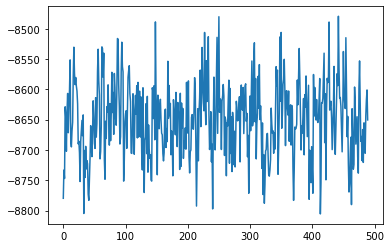

In [79]:
plt.plot(energies[10:])

In [93]:
energies_300 = list()
energies_301 = list()
for pos in tqdm_notebook(hybrid):
    thermostate = thermodynamic_state_list[0]
    integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)
    context = thermostate.create_context(integrator)
    context.setPositions(pos)
    sampler_state = SamplerState.from_context(context)
    energy = thermostate.reduced_potential(sampler_state)
    energies_300.append(energy)
    
    thermostate = thermodynamic_state_list[1]
    integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)
    context = thermostate.create_context(integrator)
    context.setPositions(pos)
    sampler_state = SamplerState.from_context(context)
    energy = thermostate.reduced_potential(sampler_state)
    energies_301.append(energy)

<ipython-input-93-807df311909c>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/500 [00:00<?, ?it/s]

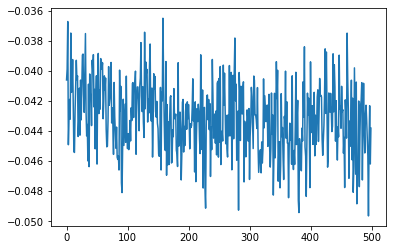

In [94]:
plt.plot(np.array(energies_300) - np.array(energies_301))

In [95]:
np.std(np.array(energies_300) - np.array(energies_301))

0.002372571416010197

## Modfiy temperature by 1 K and check that the std dev of difference in energies is small (for scaled rest)

In [96]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt

In [99]:
import pickle
import os
from openeye import oechem
from perses.annihilation.rest import RESTTopologyFactoryV2
from perses.annihilation.lambda_protocol import RESTStateV2
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache, utils
from perses.dispersed.utils import configure_platform
# cache.global_context_cache.platform = configure_platform(utils.get_fastest_platform().getName())
from simtk import openmm, unit
import math
from openmmtools.constants import kB
from openmmtools import mcmc, multistate
import argparse
import copy
from perses.dispersed import feptasks
import mdtraj as md
import numpy as np
from perses.app.relative_point_mutation_setup import PointMutationExecutor
from perses.tests.test_topology_proposal import generate_atp, generate_dipeptide_top_pos_sys


In [100]:
# Create repartitioned hybrid system for lambda 0 endstate
atp, system_generator = generate_atp(phase='solvent')
htf = generate_dipeptide_top_pos_sys(atp.topology,
                                     new_res='THR',
                                     system=atp.system,
                                     positions=atp.positions,
                                     system_generator=system_generator,
                                     conduct_htf_prop=True,
                                     repartitioned=True,
                                     endstate=0,
                                     validate_endstate_energy=False)
system = htf.hybrid_system



DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{9: 7}, {10: 7}, {11: 7}, {12: 7}, {13: 7}, {9: 8}, {10: 8}, {11: 8}, {12: 8}, {13: 8}, {9: 9}, {10: 9}, {11: 9}, {12: 9}, {13: 9}]
INFO:proposal_generator:{9: 7}
INFO:proposal_generator:{10: 7}
INFO:proposal_generator:{11: 7}
INFO:proposal_generator:{12: 7}
INFO:proposal_generator:{13: 7}
INFO:proposal_generator:{9: 8}
INFO:proposal_generator:{10: 8}
INFO:proposal_generator:{11: 8}
INFO:proposal_generator:{12: 8}
INFO:proposal_generator:{13: 8}
INFO:proposal_generator:{9: 9}
INFO:proposal_generator:{10: 9}
INFO:proposal_generator:{11: 9}
INFO:proposal_generator:{12: 9}
INFO:proposal_generator:{13: 9}
INFO:proposal_generator:Returning map that best satisfies matching_criterion
IN

making topology proposal


INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 8
INFO:geometry:Atom index proposal order is [10, 18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...


generating geometry engine
making geometry proposal from ALA to THR


INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 1654 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (7, 6, 8, 10, [1, Quantity(value=0.99000

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 8 new atoms
INFO:geometry:	reduced angle potential = 0.0465794113633988.
INFO:geometry:	reduced angle potential = 2.600901376000401.
INFO:geometry:	reduced angle potential = 0.2026015874233413.
INFO:geometry:	reduced angle potential = 0.06910508250089904.
INFO:geometry:	reduced angle potential = 0.00046779849872653263.
INFO:geometry:	reduced angle potential = 0.057279491068386326.
INFO:geometry:	reduced angle potential = 0.7547286635346248.
INFO:geometry:	reduced angle potential = 0.046388993509062296.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geome

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 9.11648114171204


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -62.46080064204813
INFO:geometry:final reduced energy -53.344321791220025
INFO:geometry:sum of energies: -53.344319500336084
INFO:geometry:magnitude of difference in the energies: 2.290883941213906e-06
INFO:geometry:Final logp_proposal: 61.23773433926977


added energy components: [('CustomBondForce', 2.3646176423860394), ('CustomAngleForce', 6.592672679212163), ('CustomTorsionForce', 17.96497457150366), ('CustomBondForce', -89.38306553515001)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 4
INFO:geometry:Atom index proposal order is [10, 13, 12, 11]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 9 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 36 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 42 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 4 new atoms
INFO:geometry:	reduced angle potential = 0.3517324280898812.
INFO:geometry:	reduced angle potential = 7.39096069988752e-11.
INFO:geometry:	reduced angle potential = 3.2058324695160406e-13.
INFO:geometry:	reduced angle potential = 1.2915588460963948e-10.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 9.11648114171204


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 20.672986687678176
INFO:geometry:final reduced energy 29.78946596595156
INFO:geometry:sum of energies: 29.789467829390215
INFO:geometry:magnitude of difference in the energies: 1.8634386549365445e-06
INFO:geometry:Final logp_proposal: -27105.594481667264


added energy components: [('CustomBondForce', 0.000520203927326505), ('CustomAngleForce', 0.4511197756248138), ('CustomTorsionForce', 7.250463344085812), ('CustomBondForce', 12.970883364040223)]


INFO:relative:*** Generating RepartitionedHybridTopologyFactory ***
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 4
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:Added MonteCarloBarostat.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.56477354, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.56477354, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.56477354), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:rel

In [101]:
# Build REST factory
for res in htf.hybrid_topology.residues:
    if res.resSeq == 2 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
traj = md.Trajectory(np.array(htf.hybrid_positions), htf.hybrid_topology)
solute_atoms = list(traj.topology.select("is_protein"))
radius = 0.3
rest_atoms = list(md.compute_neighbors(traj, radius, query_indices, haystack_indices=solute_atoms)[0])
factory = RESTTopologyFactoryV2(htf.hybrid_system, rest_atoms, use_dispersion_correction=True)

TypeError: __init__() missing 1 required positional argument: 'rest_region'

In [ ]:
# Get REST system
REST_system = factory.REST_system

# Create states for each replica
n_replicas = 12  # Number of temperature replicas.
T_min = 300.0 * unit.kelvin  # Minimum temperature.
T_max = 300.1 * unit.kelvin  # Maximum temperature.
# temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
#                 for i in range(n_replicas)]

# Create reference thermodynamic state
lambda_zero_alchemical_state = RESTStateV2.from_system(REST_system)
thermostate = ThermodynamicState(REST_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate, composable_states=[lambda_zero_alchemical_state])

In [ ]:
# Create thermodynamics states
sampler_state =  SamplerState(htf.hybrid_positions, box_vectors=htf.hybrid_system.
getDefaultPeriodicBoxVectors())
beta_0 = 1/(kB*T_min)
thermodynamic_state_list = []
sampler_state_list = []
for temperature in [T_min, T_max]:
    beta_m = 1/(kB*temperature)
    compound_thermodynamic_state_copy = copy.deepcopy(compound_thermodynamic_state)
    compound_thermodynamic_state_copy.set_alchemical_parameters(beta_0, beta_m)
    thermodynamic_state_list.append(compound_thermodynamic_state_copy)

    # now generating a sampler_state for each thermodynamic state, with relaxed positions
    # context, context_integrator = context_cache.get_context(compound_thermodynamic_state_copy)
    feptasks.minimize(compound_thermodynamic_state_copy, sampler_state, max_iterations=0)
    sampler_state_list.append(copy.deepcopy(sampler_state))


In [ ]:
thermodynamic_state_list[0].get_system().getForces()

In [ ]:
context_cache = cache.global_context_cache

In [102]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)

In [103]:
context, integrator = context_cache.get_context(thermodynamic_state_list[0], integrator)


In [104]:
sampler_state_list[0].apply_to_context(context)

In [105]:
hybrid = list()
energies = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
#     sampler_state = SamplerState.from_context(context)
#     energy = thermodynamic_state_list[0].reduced_potential(sampler_state)
#     energy = context.getState(getEnergy=True).getPotentialEnergy().value_in_unit_system(unit.md_unit_system)
#     energies.append(energy)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)

<ipython-input-105-1c87c9a97344>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [106]:
energies_300 = list()
energies_301 = list()
for pos in tqdm_notebook(hybrid):
    thermostate = thermodynamic_state_list[0]
    integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)
    context = thermostate.create_context(integrator)
    context.setPositions(pos)
    sampler_state = SamplerState.from_context(context)
    energy = thermostate.reduced_potential(sampler_state)
    energies_300.append(energy)
    
    thermostate = thermodynamic_state_list[1]
    integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                              collision_rate=1 / unit.picoseconds,
                                              timestep= 4 * unit.femtoseconds)
    context = thermostate.create_context(integrator)
    context.setPositions(pos)
    sampler_state = SamplerState.from_context(context)
    energy = thermostate.reduced_potential(sampler_state)
    energies_301.append(energy)

<ipython-input-106-409f47f2bc49>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/500 [00:00<?, ?it/s]

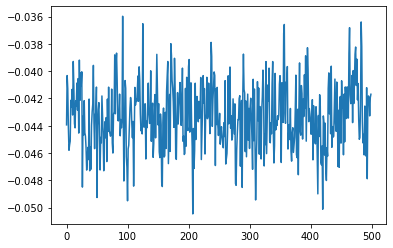

In [107]:
plt.plot(np.array(energies_300) - np.array(energies_301))

In [108]:
np.std(np.array(energies_300) - np.array(energies_301))

0.00241714909059477